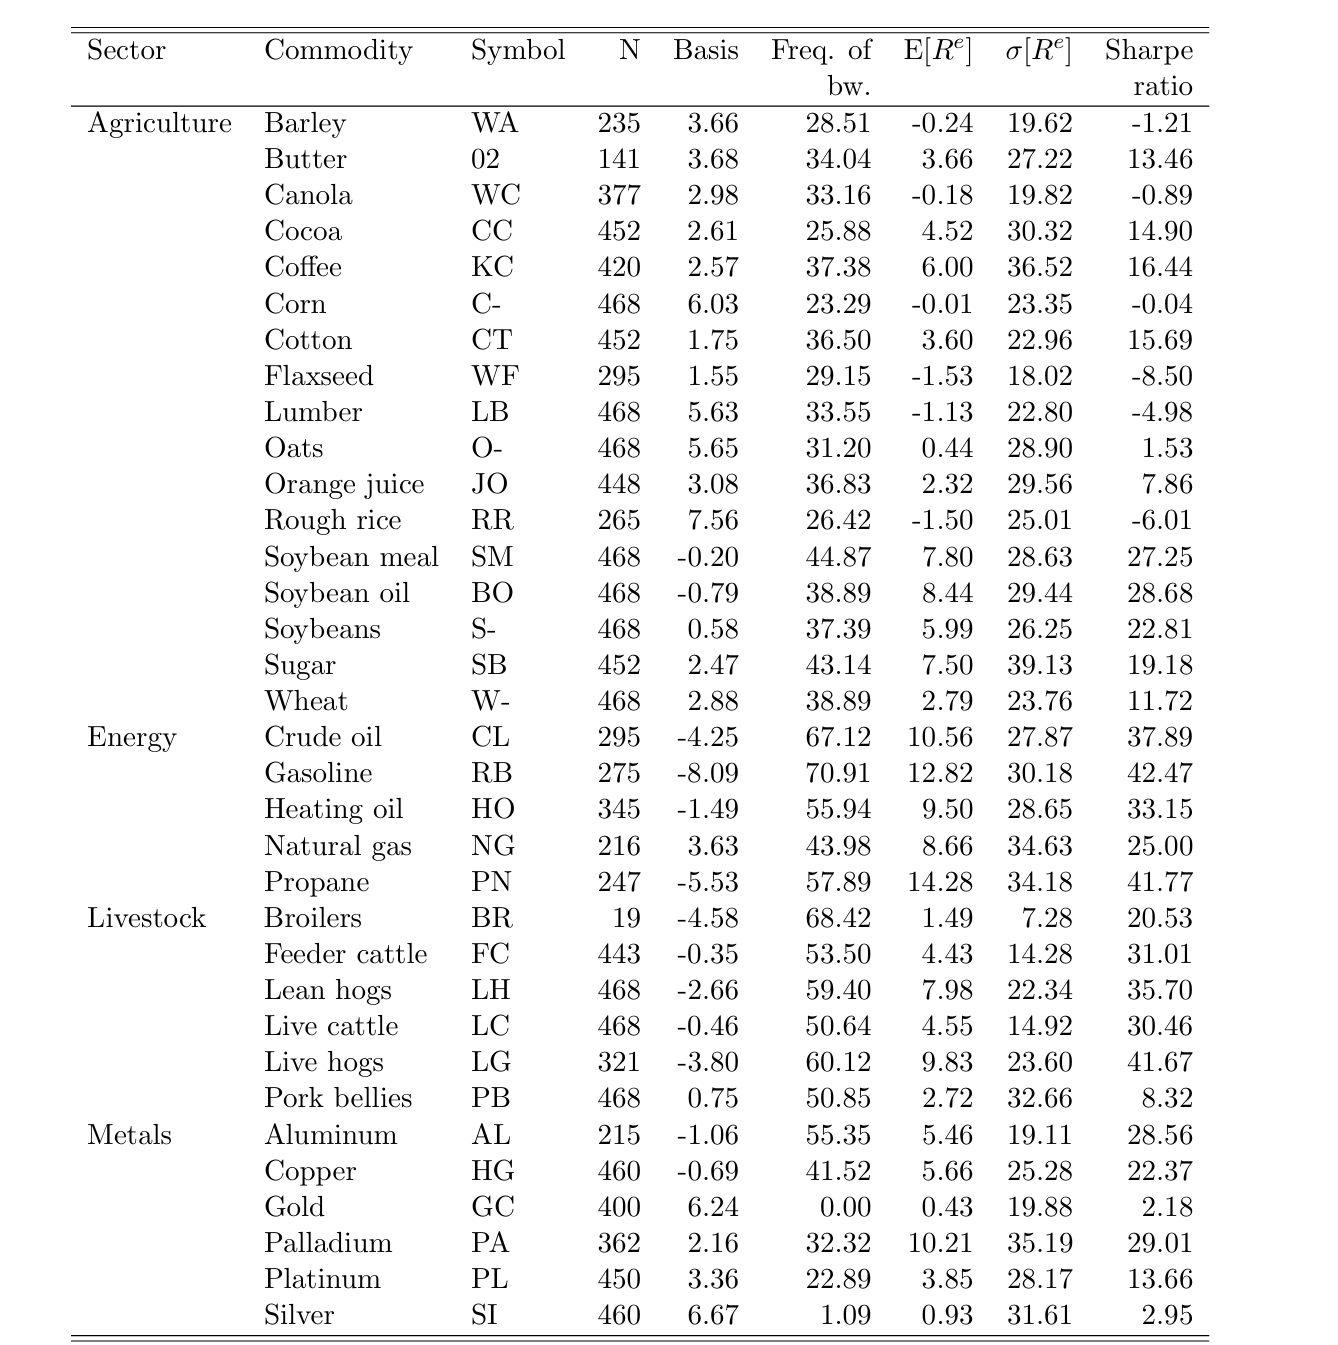

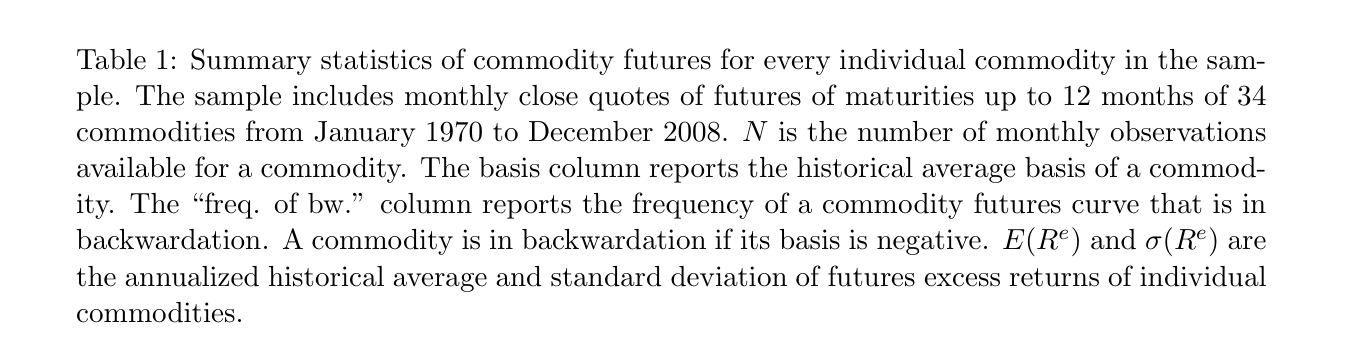

In [1]:

import pandas as pd
from settings import config
import numpy as np
DATA_DIR = config("DATA_DIR")

In [2]:
import wrds
db = wrds.Connection()

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [8]:
inq_info = """
SELECT *
FROM tr_ds_fut.wrds_contract_info
WHERE exchtickersymb = 'WA'
LIMIT 100

"""
inq_info = db.raw_sql(inq_info)



In [10]:
inq_info

,futcode,contrcode,clscode,dsmnem,contrname,ldb,contrdate,contrdatefmt,isocurrcode,isocurrdesc,...,startdate,lasttrddate,sttlmntdate,expirationdate,firstnoticedate,lastnoticedate,firstdelvrydate,ticksizeunitcode,exchtickersymb,trdmonths
0,151087.0,4045.0,3022.0,WWA1213,CRUDE CSO JAN0,CIE,1213,None,CAD,Canadian Dollar,...,2012-01-20,2013-12-13,2013-12-13,None,2013-11-29,None,None,None,WA,DEC JUL MAR MAY OCT
1,151326.0,4045.0,3022.0,WWA1014,CRUDE CSO JAN0,CIE,1014,None,CAD,Canadian Dollar,...,2012-01-20,2014-10-14,2014-10-14,None,2014-09-30,None,None,None,WA,DEC JUL MAR MAY OCT
2,151327.0,4045.0,3022.0,WWA1012,CRUDE CSO JAN0,CIE,1012,None,CAD,Canadian Dollar,...,2012-01-20,2012-10-12,2012-10-12,None,None,None,None,None,WA,DEC JUL MAR MAY OCT
3,151492.0,4045.0,3022.0,WWA0713,CRUDE CSO JAN0,CIE,0713,None,CAD,Canadian Dollar,...,2012-01-20,2013-07-12,2013-07-12,None,2013-06-28,None,None,None,WA,DEC JUL MAR MAY OCT
4,151734.0,4045.0,3022.0,WWA1212,CRUDE CSO JAN0,CIE,1212,None,CAD,Canadian Dollar,...,2012-01-20,2012-12-14,2012-12-14,None,None,None,None,None,WA,DEC JUL MAR MAY OCT
5,151735.0,4045.0,3022.0,WWA0513,CRUDE CSO JAN0,CIE,0513,None,CAD,Canadian Dollar,...,2012-01-20,2013-05-14,2013-05-14,None,2013-04-30,None,None,None,WA,DEC JUL MAR MAY OCT
6,151843.0,4045.0,3022.0,WWA1013,CRUDE CSO JAN0,CIE,1013,None,CAD,Canadian Dollar,...,2012-01-20,2013-10-11,2013-10-11,None,2013-09-30,None,None,None,WA,DEC JUL MAR MAY OCT
7,151844.0,4045.0,3022.0,WWA0714,CRUDE CSO JAN0,CIE,0714,None,CAD,Canadian Dollar,...,2012-01-20,2014-07-14,2014-07-14,None,2014-06-30,None,None,None,WA,DEC JUL MAR MAY OCT
8,152727.0,4045.0,3022.0,WWA0514,CRUDE CSO JAN0,CIE,0514,None,CAD,Canadian Dollar,...,2012-01-20,2014-05-14,2014-05-14,None,2014-04-30,None,None,None,WA,DEC JUL MAR MAY OCT
9,152728.0,4045.0,3022.0,WWA0314,CRUDE CSO JAN0,CIE,0314,None,CAD,Canadian Dollar,...,2012-01-20,2014-03-14,2014-03-14,None,2014-02-28,None,None,None,WA,DEC JUL MAR MAY OCT


In [ ]:
query = """SELECT * 
FROM tr_ds_fut.wrds_fut_contract 
WHERE futcode = '1306'
LIMIT 1000"""
data = db.raw_sql(query)
data

In [ ]:
df = df.sort_values(['futcode', 'date_'])
monthly_close = (
    df.groupby(['futcode', 'year_month'])
    .tail(1)  
    .reset_index(drop=True)
)

In [ ]:
rows = []
for (ym), grp in monthly_close.groupby('year_month'):
    sub_1m = grp.iloc[(grp['months_to_exp'] - 1).abs().argsort()[:1]]
    if sub_1m.empty:
        continue
    settle_1m = sub_1m['settlement'].values[0]
    actual_1m_exp = sub_1m['months_to_exp'].values[0]

    sub_12m = grp.iloc[(grp['months_to_exp'] - 12).abs().argsort()[:1]]
    if sub_12m.empty:
        continue
    settle_12m = sub_12m['settlement'].values[0]
    actual_12m_exp = sub_12m['months_to_exp'].values[0]

    rows.append({
        'year_month': ym,
        'settle_1m': settle_1m,
        'm_exp_1m': actual_1m_exp,
        'settle_12m': settle_12m,
        'm_exp_12m': actual_12m_exp
    })

res = pd.DataFrame(rows)
res = res.sort_values('year_month')

res['basis'] = (np.log(res['settle_12m']) - np.log(res['settle_1m'])) / (12 - 1)

res = res[(res['year_month'] >= '1970-01') & (res['year_month'] <= '2008-12')]
res = res.dropna()


N = len(res)

summary = pd.DataFrame({
    'N': [N],
    'basis_mean': [res['basis'].mean()],
    'basis_std': [res['basis'].std()]
})

summary

,N,basis_mean,basis_std
0,156,-0.007098,0.003717


In [ ]:
query = """SELECT * 
FROM tr_ds_fut.wrds_fut_contract 
WHERE futcode = '1306'
LIMIT 1000"""
data = db.raw_sql(query)
data

,futcode,date_,open_,high,low,volume,settlement,openinterest,p,pb,...,wa,ca,yd,hm,ha,mt,la,lm,oa,up
0,1306.0,1980-09-25,232.000000,234.000000,230.000000,0.0,232.000000,0.0,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1306.0,1980-09-26,231.500000,234.000000,229.000000,0.0,231.500000,0.0,None,None,...,None,None,None,None,None,None,None,None,None,None
2,1306.0,1980-09-29,223.500000,224.000000,223.000000,0.0,223.500000,0.0,None,None,...,None,None,None,None,None,None,None,None,None,None
3,1306.0,1980-09-30,230.500000,232.000000,229.000000,0.0,230.500000,0.0,None,None,...,None,None,None,None,None,None,None,None,None,None
4,1306.0,1980-10-01,224.500000,227.000000,222.000000,0.0,224.500000,0.0,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,1306.0,1982-03-22,66.000000,66.000000,66.000000,1.0,66.000000,21.0,None,None,...,None,None,None,None,None,None,None,None,None,None
372,1306.0,1982-03-23,67.629990,68.000000,67.250000,3.0,67.250000,13.0,None,None,...,None,None,None,None,None,None,None,None,None,None
373,1306.0,1982-03-24,67.750000,68.000000,66.000000,2.0,67.000000,10.0,None,None,...,None,None,None,None,None,None,None,None,None,None
374,1306.0,1982-03-25,67.750000,68.500000,67.000000,0.0,67.000000,1.0,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
db.close()